<h1 style="color:blue";> U.S. Natural Gas and Gas Condensate Production Well Counts</h1>
<h3 style="color:blue";>1989 to 2020</h3>
<br>
<p>
    Data is retrieved from <a href=https://www.eia.gov/dnav/ng/ng_prod_wells_s1_a.htm>eia.gov</a> <br>
    
</p>

In [98]:
# Import libaries used in notebook
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', False)

In [99]:
# Read in data from flat file (csv) downloaded from noted site
data_file = "..\\data\\NG_PROD_WELLS_1989_to_2020.csv"
df = pd.read_csv(data_file)

In [100]:
# Clean up column names and data
cols = []
for c in df.columns:
    c = c.replace(" Natural Gas Number of Gas and Gas Condensate Wells (Count)","")
    c = c.replace(" Number of Gas and Gas Condensate Wells of Natural Gas (Number of Elements)","")
    cols.append(c)
df.columns = cols
df.fillna(0, inplace=True)
df[df.columns[0:]] = df[df.columns[0:]].apply(lambda x: x.astype(int) )

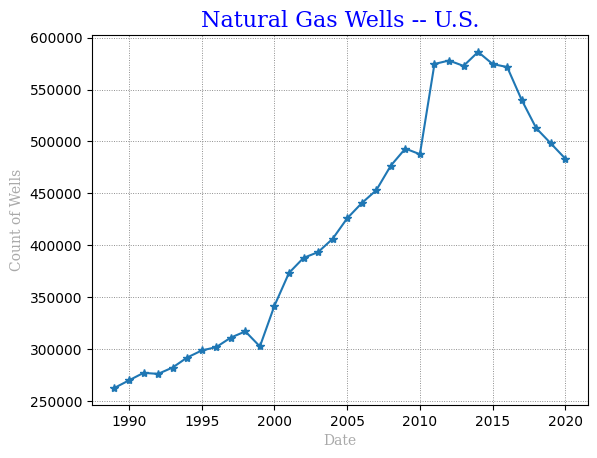

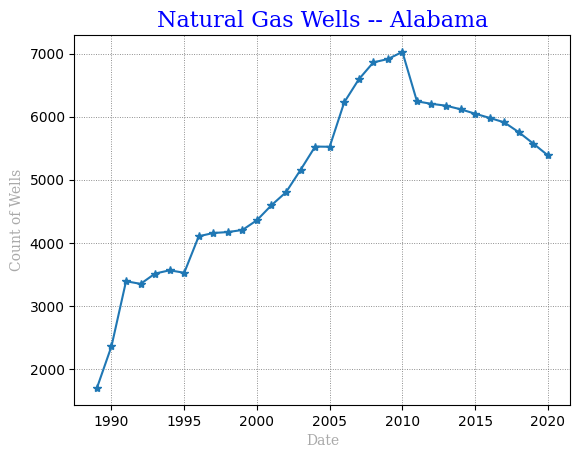

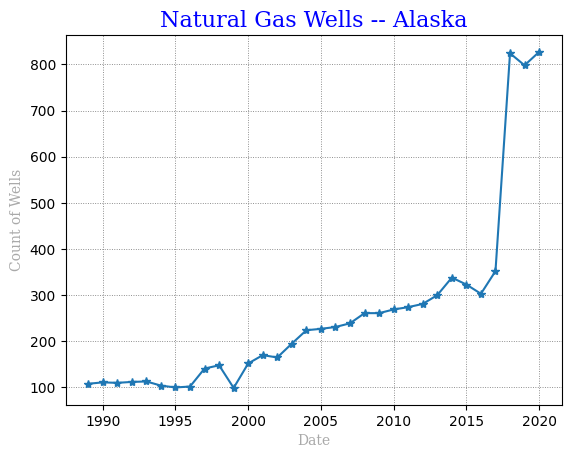

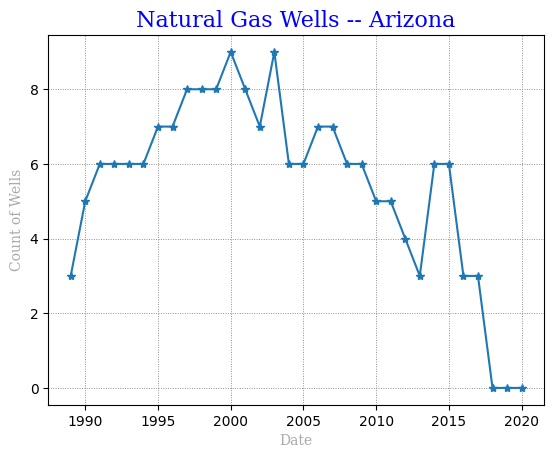

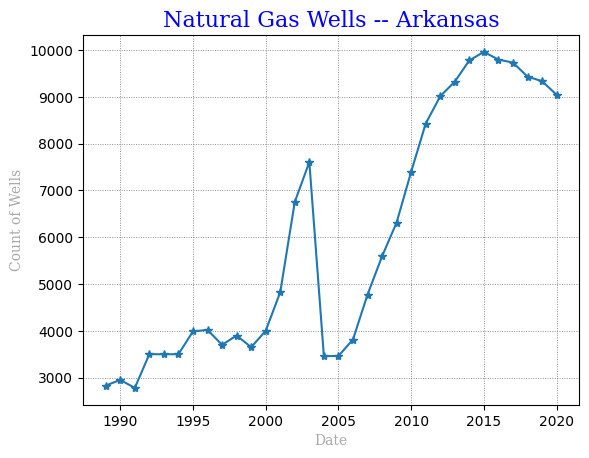

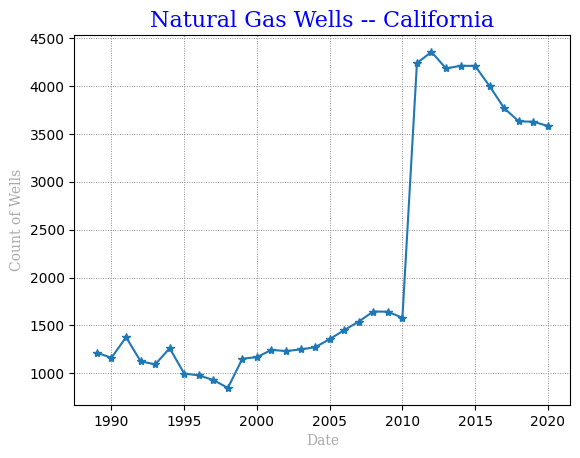

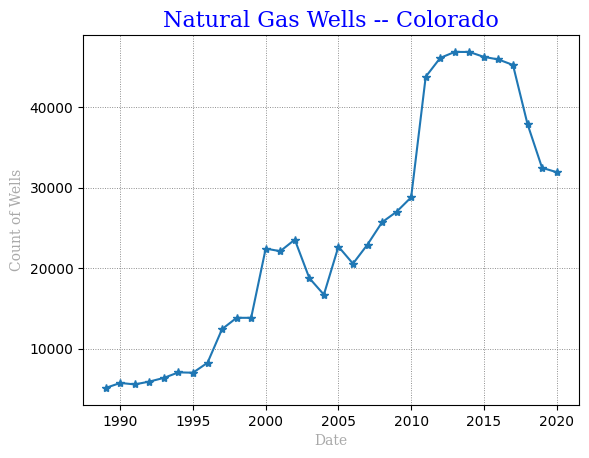

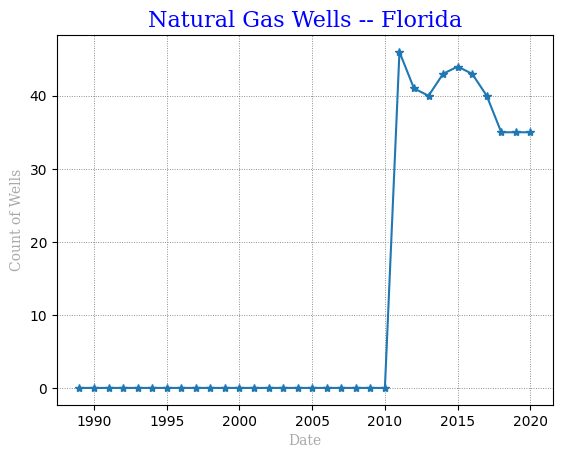

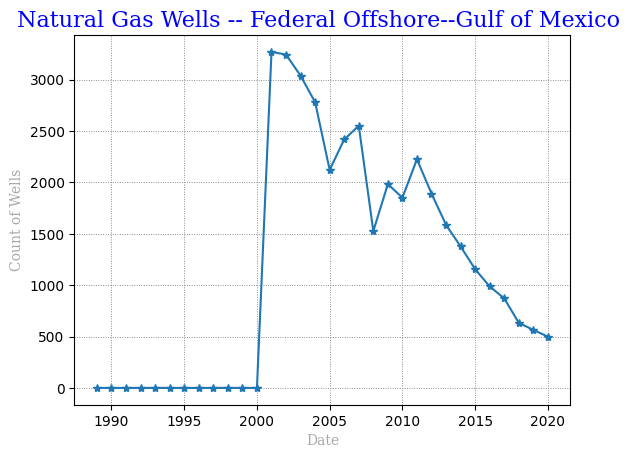

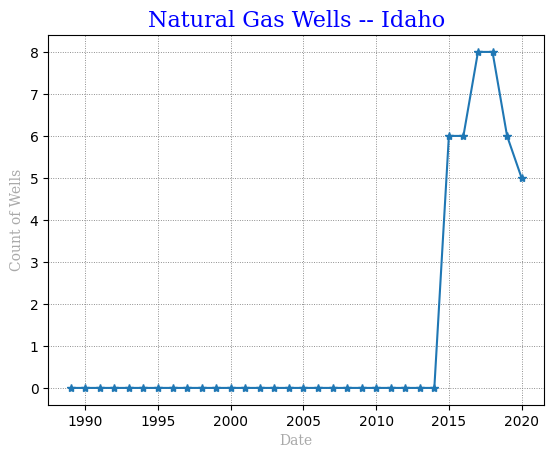

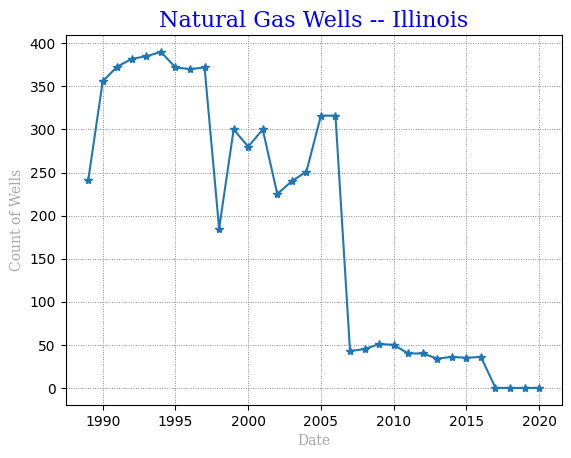

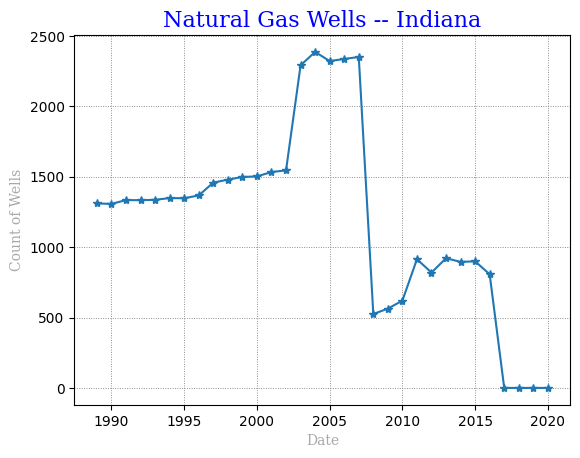

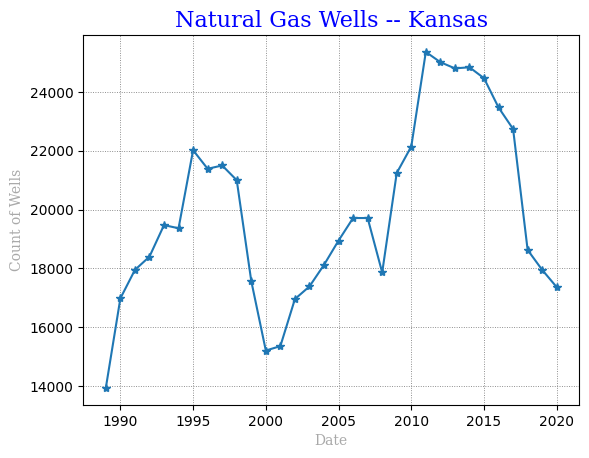

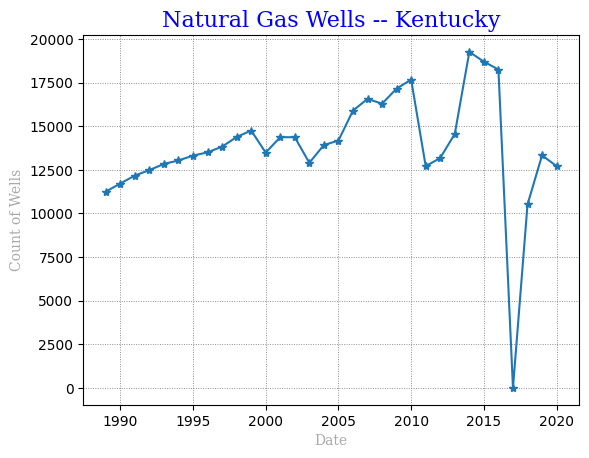

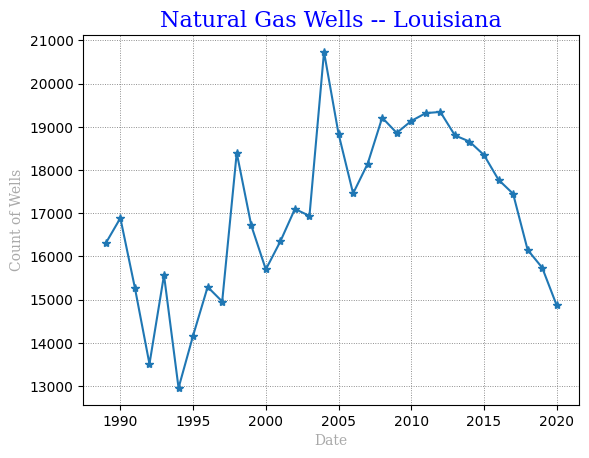

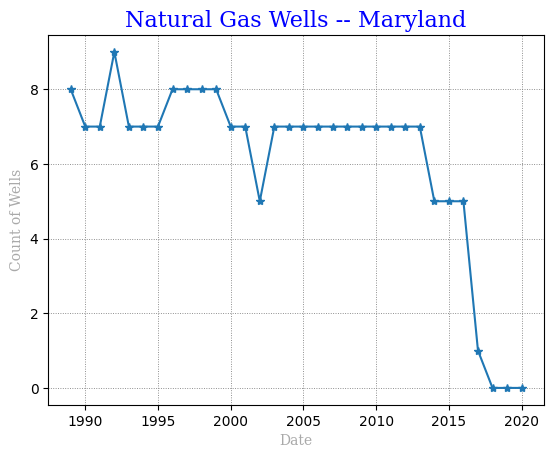

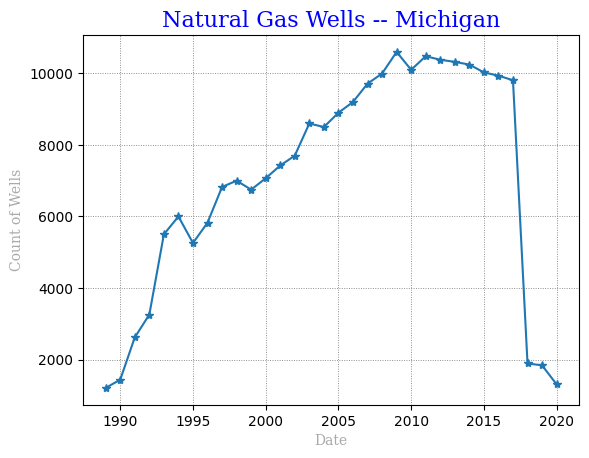

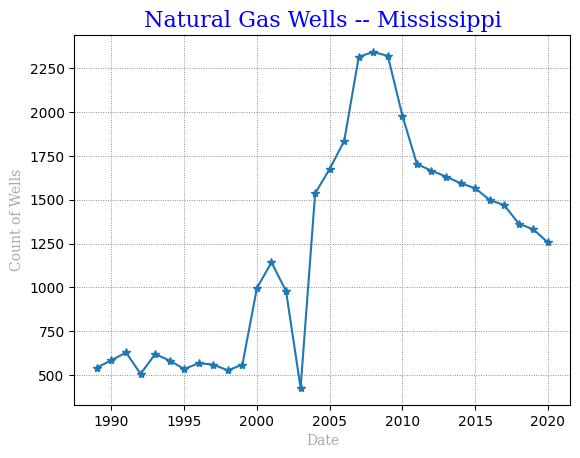

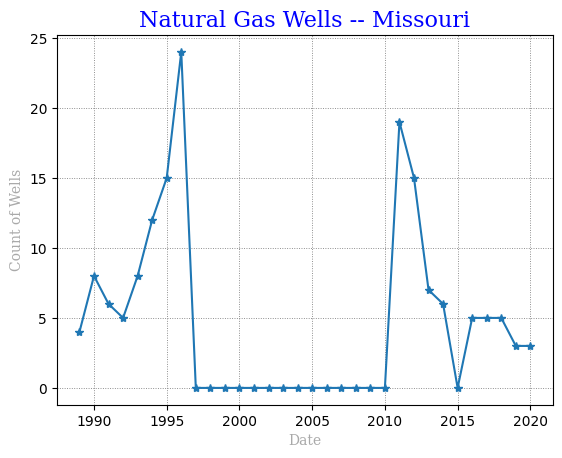

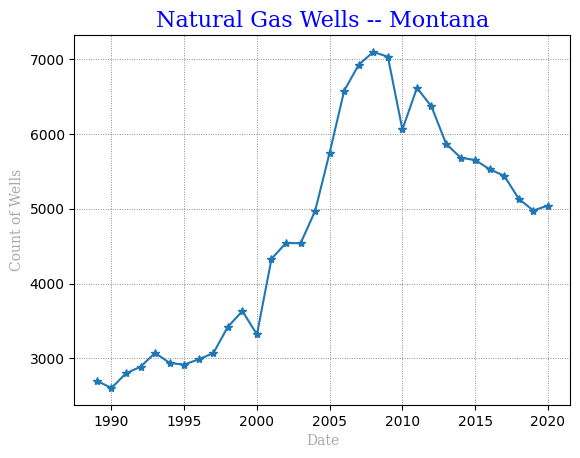

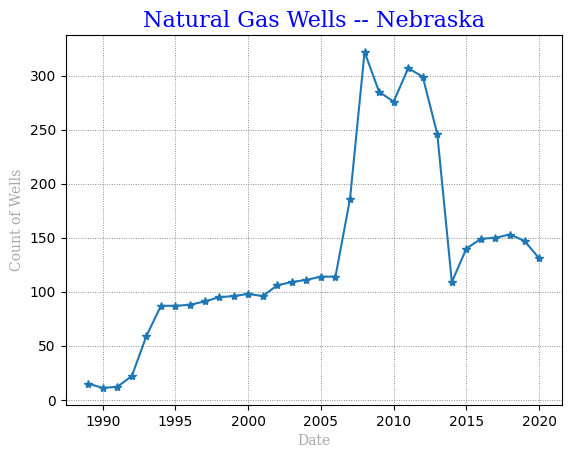

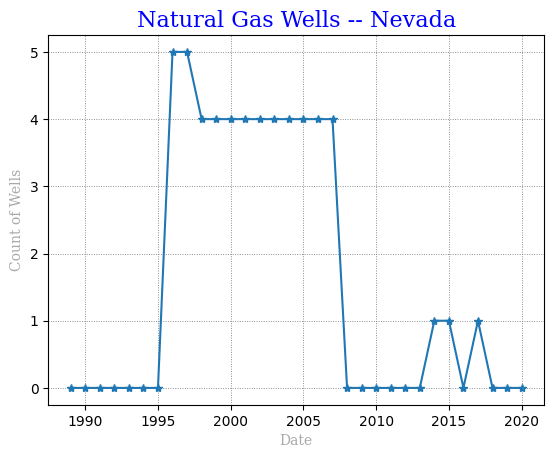

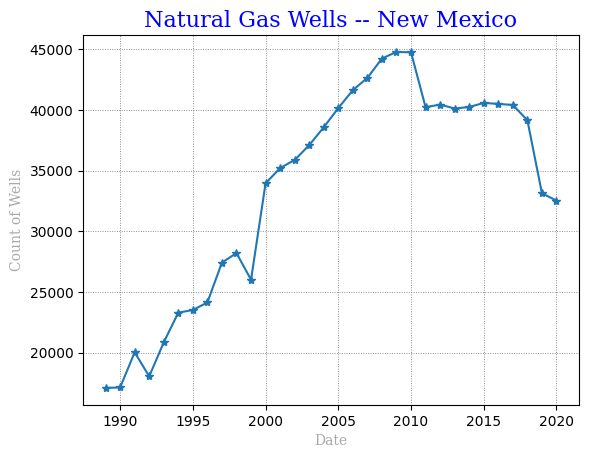

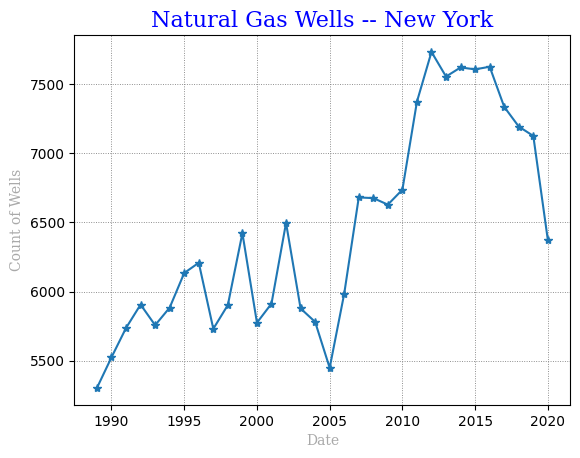

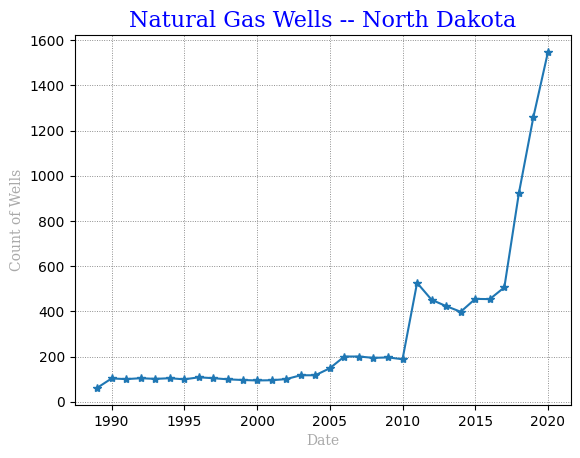

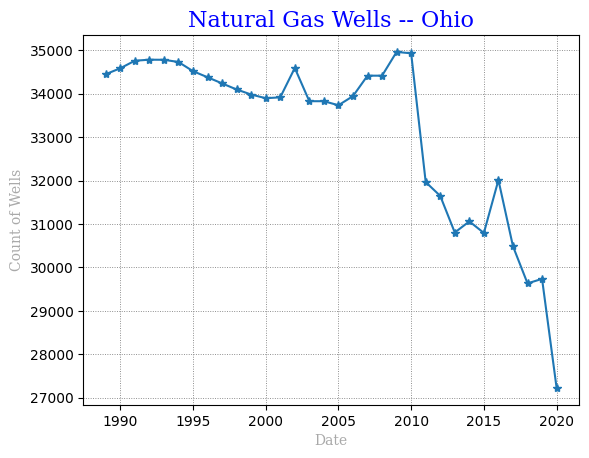

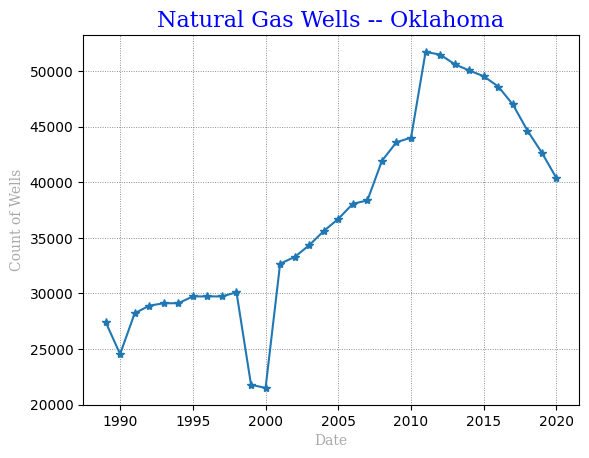

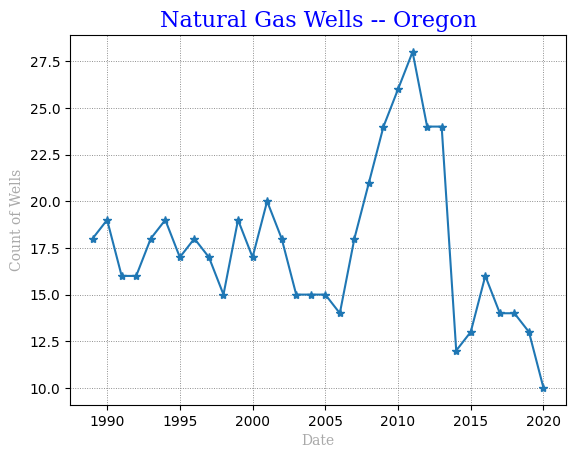

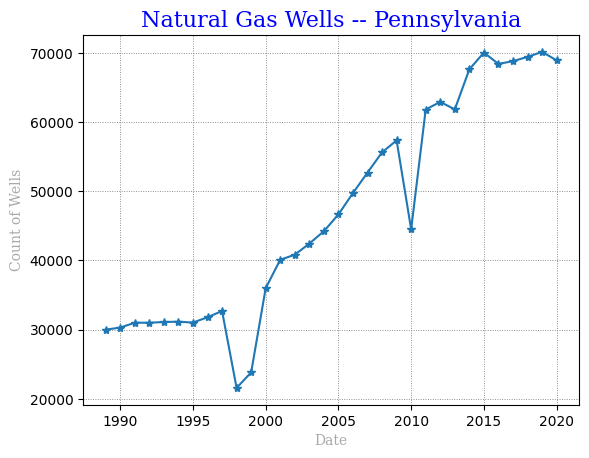

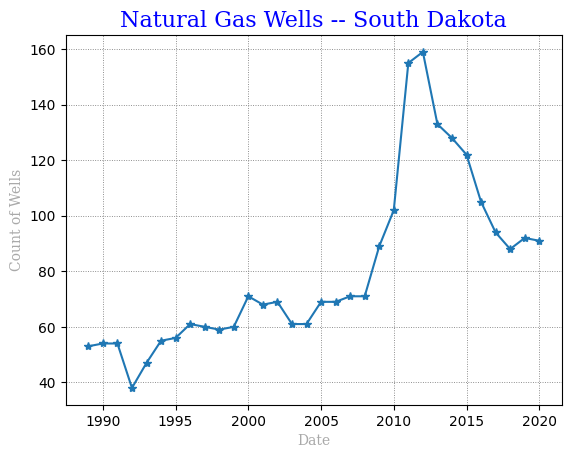

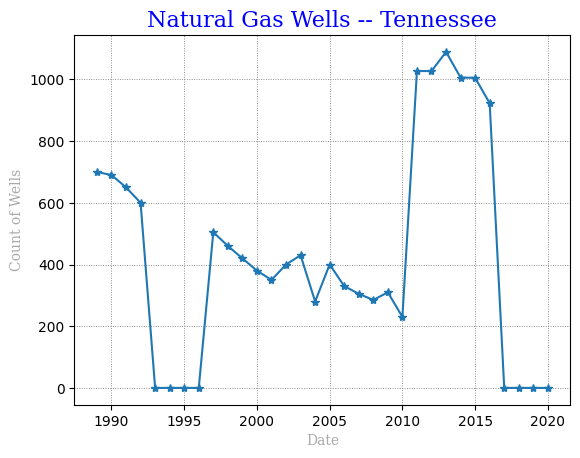

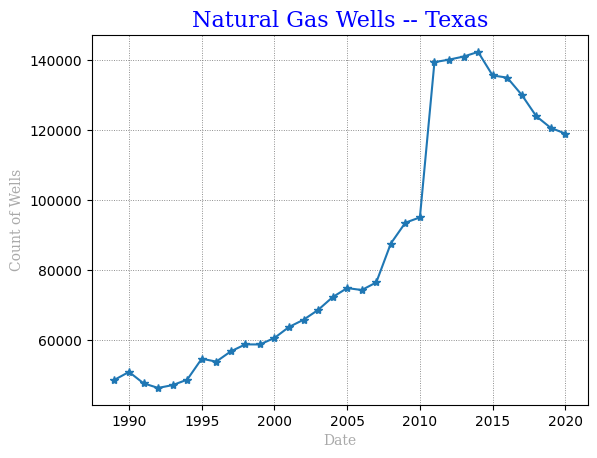

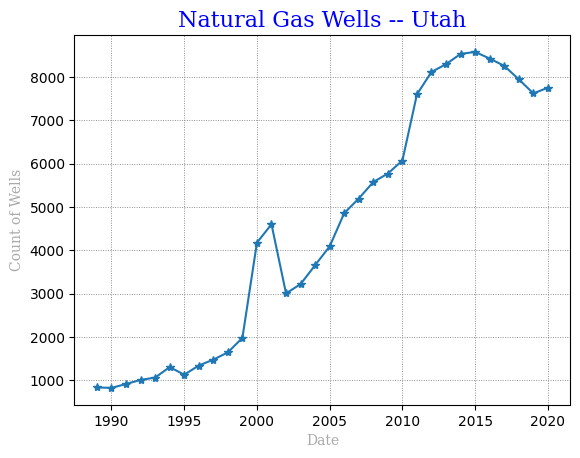

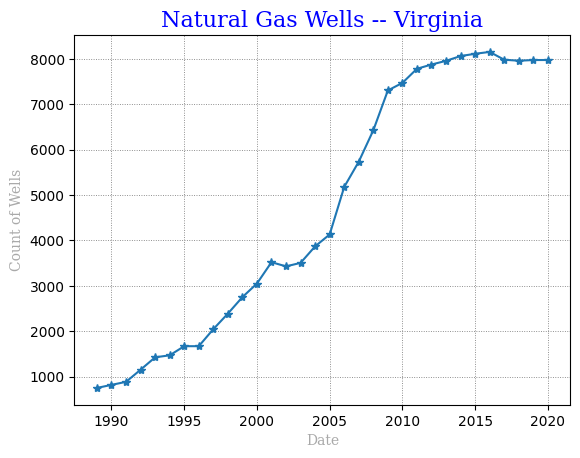

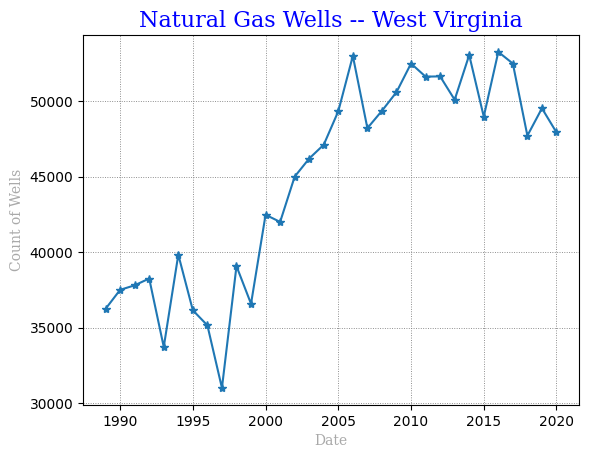

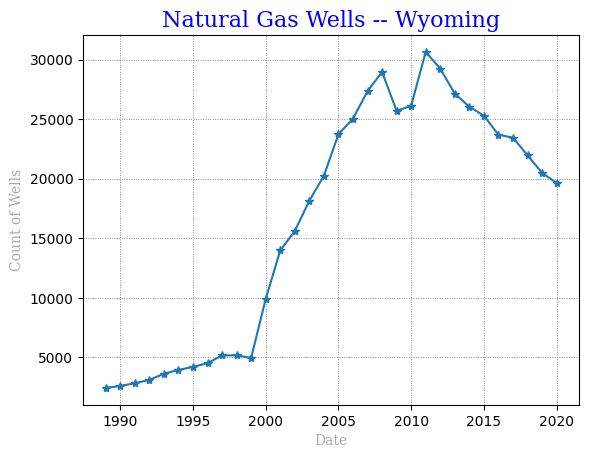

In [101]:
x = df['Date'].copy()
label_font = {'family':'serif', 'color': 'darkgray', 'size': 10}
title_font = {'family' : 'serif', 'color' : 'blue', 'size' : 16}

for c in df.columns[1:]:
    y = df[c].copy()
    plt.plot(x, y, marker = '*')
    plt.xlabel('Date', fontdict = label_font)
    plt.ylabel('Count of Wells', fontdict = label_font)
    plt.title(f"Natural Gas Wells -- {c}", fontdict = title_font)
    plt.grid(color='gray', linestyle = ':', linewidth=0.65)
    plt.show()


In [102]:
data = df.copy()

In [103]:
for c in df.columns[2:]:
    df[c] = df[c] / df['U.S.'] * 100
    df[c] = df[c].apply(lambda x: np.round(x, 3)
df['U.S.'] = df['U.S.'] / df['U.S.'] * 100
df['U.S.'] = df['U.S.'].apply(lambda x: np.round(x, 2))

In [113]:
df['Check'] = df[df.columns[2:]].sum(axis=1)
print(df.head(40))
df.drop(columns=['Check'], inplace=True)

    Date   U.S.  Alabama  Alaska  Arizona  Arkansas  ...  Texas  Utah  Virginia  West Virginia  Wyoming   Check
0   1989  100.0     0.65    0.04      0.0      1.08  ...  18.52  0.32      0.29          13.81     0.93  100.02
1   1990  100.0     0.88    0.04      0.0      1.09  ...  18.85  0.30      0.30          13.90     0.96   99.98
2   1991  100.0     1.22    0.04      0.0      1.00  ...  17.19  0.33      0.32          13.65     1.02   99.99
3   1992  100.0     1.21    0.04      0.0      1.27  ...  16.77  0.36      0.42          13.86     1.13  100.00
4   1993  100.0     1.25    0.04      0.0      1.24  ...  16.69  0.38      0.51          11.95     1.28  100.02
5   1994  100.0     1.22    0.04      0.0      1.20  ...  16.68  0.45      0.50          13.65     1.35  100.01
6   1995  100.0     1.18    0.03      0.0      1.34  ...  18.30  0.38      0.56          12.11     1.41  100.00
7   1996  100.0     1.36    0.03      0.0      1.33  ...  17.83  0.44      0.55          11.65     1.49 